<a href="https://colab.research.google.com/github/muaazmumtaz/Practice/blob/main/1.%20A-star%20with%20Mapping%20Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

from gitly.colab.plot import GitlyPlotter
gitly = GitlyPlotter('github')

# Pilihan Provinsi (Latitude dan Longitude) dan Penentuan Jalur

### Provinsi
SUMUT = [1.9936886107216547, 99.72704155796039]<br>
SUMBAR = [-0.7700187962948629, 100.96333901714385]<br>
LAMPUNG = [-4.485778308307726, 105.3274174364107]<br>
JATIM = [-7.462565908892256, 111.84800737196667]<br>
NTB = [-8.650722788338053, 117.51601993057614]<br>
KALBAR = [-0.2196394048092628, 111.58375594641173]<br>
KALUT = [3.155402745678708, 116.15625220001704]<br>
SULUT = [0.6812037950888119, 124.374149955502]<br>
MALUT = [1.6485428750246147, 127.67146738955152]<br>
PAPUA = [-4.249247485095345, 138.18192749333787]<br>

### Penentuan Jalur
Sumut --> Sumbar, Kalbar, Jatim<br>
Sumbar --> Lampung<br>
Lampung --> Kalbar, Jatim<br>
Jatim --> NTB<br>
NTB --> Malut, Papua<br>
Kalbar --> Kalut, NTB<br>
Kalut --> NTB, Sulut, Papua<br>
Sulut --> Malut<br>
Malut --> Papua<br>
Papua <br>

# A* Searching Method

## Formula

# <Center> f(n) = g(n) + h(n)</center>

## f(n) = Perkiraan Total
## g(n) = Jarak Node Awal ke Node N
## h(n) = Jarak Node ke Tujuan

# Dataset Provinsi dan h(n)

In [2]:
dict_lokasi = {'provinsi':['SUMUT','SUMBAR','LAMPUNG','JATIM','NTB',
                           'KALBAR','KALUT','SULUT','MALUT','PAPUA'],
               'provinsi_text':['Sumatera Utara','Sumatera Barat','Lampung','Jawa Timur','Nusa Tenggara Barat',
                                'Kalimantan Barat','Kalimantan Utara','Sulawesi Utara','Maluku Utara','Papua'],
               'latitude':[1.9936886107216547, -0.7700187962948629,
                           -4.485778308307726, -7.462565908892256,
                           -8.650722788338053, -0.2196394048092628,
                           3.155402745678708, 0.6812037950888119,
                           1.6485428750246147, -4.249247485095345], 
               'longitude':[99.72704155796039, 100.96333901714385,
                            105.3274174364107, 111.84800737196667,
                            117.51601993057614, 111.58375594641173,
                            116.15625220001704, 124.374149955502,
                            127.67146738955152, 138.18192749333787],
               'tujuan(km)':[4338.33,4171.22,3634.48,2928.40,2338.04,
                               2986.73,2584.84,1630.46,1340.84,0]}
df_hn = pd.DataFrame(dict_lokasi)
df_hn

,provinsi,provinsi_text,latitude,longitude,tujuan(km)
0,SUMUT,Sumatera Utara,1.993689,99.727042,4338.33
1,SUMBAR,Sumatera Barat,-0.770019,100.963339,4171.22
2,LAMPUNG,Lampung,-4.485778,105.327417,3634.48
3,JATIM,Jawa Timur,-7.462566,111.848007,2928.40
4,NTB,Nusa Tenggara Barat,-8.650723,117.516020,2338.04
5,KALBAR,Kalimantan Barat,-0.219639,111.583756,2986.73
6,KALUT,Kalimantan Utara,3.155403,116.156252,2584.84
7,SULUT,Sulawesi Utara,0.681204,124.374150,1630.46
8,MALUT,Maluku Utara,1.648543,127.671467,1340.84
9,PAPUA,Papua,-4.249247,138.181927,0.00


# Dataset Rute dan g(n)

In [3]:
dict_rute = {'prov_awal':['SUMUT','SUMUT','SUMUT',
                          'SUMBAR',
                          'LAMPUNG','LAMPUNG',
                          'JATIM',
                          'KALBAR','KALBAR',
                          'KALUT','KALUT','KALUT',
                          'NTB','NTB',
                          'SULUT',
                          'MALUT'], 
             'prov_tujuan':['SUMBAR','KALBAR','JATIM',
                            'LAMPUNG',
                            'KALBAR','JATIM',
                            'NTB',
                            'KALUT','NTB',
                            'NTB','SULUT','PAPUA',
                            'MALUT','PAPUA',
                            'MALUT',
                            'PAPUA'],
             'lat_awal':[1.9936886107216547,1.9936886107216547,1.9936886107216547,
                         -0.7700187962948629,
                         -4.485778308307726,-4.485778308307726,
                         -7.462565908892256,
                         -0.2196394048092628,-0.2196394048092628,
                         3.155402745678708,3.155402745678708,3.155402745678708,
                         -8.650722788338053,-8.650722788338053,
                         0.6812037950888119,
                         1.6485428750246147],
             'lat_tujuan':[-0.7700187962948629,-0.2196394048092628,-7.462565908892256,
                           -4.485778308307726,
                           -0.2196394048092628,-7.462565908892256,
                           -8.650722788338053,
                           3.155402745678708,-8.650722788338053,
                           -8.650722788338053,0.6812037950888119,-4.249247485095345,
                           1.6485428750246147,-4.249247485095345,
                           1.6485428750246147,
                           -4.249247485095345], 
             'lon_awal':[99.72704155796039,99.72704155796039,99.72704155796039,
                         100.96333901714385,
                         105.3274174364107,105.3274174364107,
                         111.84800737196667,
                         111.58375594641173,111.58375594641173,
                         116.15625220001704,116.15625220001704,116.15625220001704,
                         117.51601993057614,117.51601993057614,
                         124.374149955502,
                         127.67146738955152],
             'lon_tujuan':[100.96333901714385,111.58375594641173,111.84800737196667,
                           105.3274174364107,
                           111.58375594641173,111.84800737196667,
                           117.51601993057614,
                           116.15625220001704,117.51601993057614,
                           117.51601993057614,124.374149955502,138.18192749333787,
                           127.67146738955152,138.18192749333787,
                           127.67146738955152,
                           138.18192749333787],
             'jarak(km)':[334.82,1337.40,1707.19,
                          631.17,
                          843.60,793.10,
                          638.69,
                          633.99,1145.31,
                          1312.38,953.61,2584.88,
                          1599.89,2334.78,
                          382.95,
                          1342.23]}
df_gn = pd.DataFrame(dict_rute)
df_gn

,prov_awal,prov_tujuan,lat_awal,lat_tujuan,lon_awal,lon_tujuan,jarak(km)
0,SUMUT,SUMBAR,1.993689,-0.770019,99.727042,100.963339,334.82
1,SUMUT,KALBAR,1.993689,-0.219639,99.727042,111.583756,1337.40
2,SUMUT,JATIM,1.993689,-7.462566,99.727042,111.848007,1707.19
3,SUMBAR,LAMPUNG,-0.770019,-4.485778,100.963339,105.327417,631.17
4,LAMPUNG,KALBAR,-4.485778,-0.219639,105.327417,111.583756,843.60
5,LAMPUNG,JATIM,-4.485778,-7.462566,105.327417,111.848007,793.10
6,JATIM,NTB,-7.462566,-8.650723,111.848007,117.516020,638.69
7,KALBAR,KALUT,-0.219639,3.155403,111.583756,116.156252,633.99
8,KALBAR,NTB,-0.219639,-8.650723,111.583756,117.516020,1145.31
9,KALUT,NTB,3.155403,-8.650723,116.156252,117.516020,1312.38


# Mapping Rute

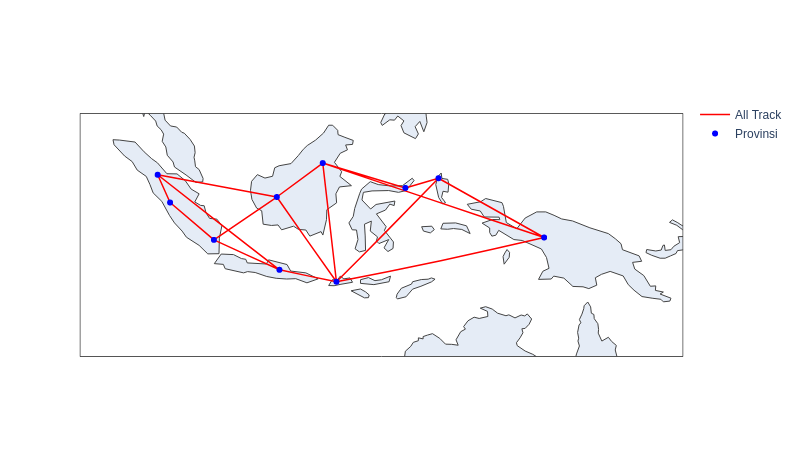

In [4]:
lons = []
lats = []
lons = np.empty(3 * len(df_gn))
lons[::3] = df_gn['lon_awal']
lons[1::3] = df_gn['lon_tujuan']
lons[2::3] = None
lats = np.empty(3 * len(df_gn))
lats[::3] = df_gn['lat_awal']
lats[1::3] = df_gn['lat_tujuan']
lats[2::3] = None

fig = go.Figure()
fig.update_geos(
    center=dict(lon=122, lat=-4),
    lataxis_range=[-12,12], lonaxis_range=[-30, 30]
)


fig.add_trace(
    go.Scattergeo(
        lon = lons,
        lat = lats,
        mode = 'lines',
        name='All Track',
        line = dict(width = 1.5,color = 'red'),
        opacity = 1
    )
)
fig.add_trace(
    go.Scattergeo(
        lon = df_hn['longitude'],
        lat = df_hn['latitude'],
        text = df_hn['provinsi_text'],
        locationmode = 'geojson-id',
        mode='markers',
        name='Provinsi',
        marker = dict(color = 'blue')
    )
)
fig.update(layout_showlegend=True)
gitly.show(fig)

In [5]:
# SUMUT to PAPUA

df_kumpulan_rute = df_gn[['prov_awal', 'prov_tujuan', 'jarak(km)']].copy()

reversed_1 = df_gn['prov_awal'].tolist()
reversed_2 = df_gn['prov_tujuan'].tolist()
jarak_1 = df_gn['jarak(km)'].tolist()

reversed_data = {'prov_awal':reversed_2, 'prov_tujuan':reversed_1, 'jarak(km)':jarak_1}
df_kumpulan_rute_inversed = pd.DataFrame(data=reversed_data)

df_kumpulan_rute = df_kumpulan_rute.append(df_kumpulan_rute_inversed)
df_kumpulan_rute = df_kumpulan_rute.merge(df_hn[['provinsi','tujuan(km)']],
                                          left_on = 'prov_tujuan',
                                          right_on='provinsi',
                                          how = 'left').drop(columns=['provinsi'])
df_kumpulan_rute

,prov_awal,prov_tujuan,jarak(km),tujuan(km)
0,SUMUT,SUMBAR,334.82,4171.22
1,SUMUT,KALBAR,1337.40,2986.73
2,SUMUT,JATIM,1707.19,2928.40
3,SUMBAR,LAMPUNG,631.17,3634.48
4,LAMPUNG,KALBAR,843.60,2986.73
5,LAMPUNG,JATIM,793.10,2928.40
6,JATIM,NTB,638.69,2338.04
7,KALBAR,KALUT,633.99,2584.84
8,KALBAR,NTB,1145.31,2338.04
9,KALUT,NTB,1312.38,2338.04


In [6]:
def a_star_map(dataset_name,
               kolom_awal, awal, 
               kolom_tujuan, tujuan,
               h_n, g_n) :
    dataset_copy = dataset_name.copy()
    df = pd.DataFrame(columns=dataset_copy.columns.tolist())
    
    step = 1
#     Root
    df = df.append(dataset_copy.loc[dataset_copy[kolom_awal]==awal].copy())
    df['g_n'] = df[g_n]
    df['h_n'] = df[h_n]
    df['f_n'] = df['g_n'] + df['h_n']
    df['step'] = step
    df['f_n_min'] = float(0)
    dataset_copy = dataset_copy[~dataset_copy[[kolom_awal,
                                               kolom_tujuan,
                                               h_n,
                                               g_n]].isin(df[[kolom_awal,
                                                              kolom_tujuan,
                                                              h_n,
                                                              g_n]])]
    dataset_copy = dataset_copy.dropna()
    df_drop = pd.DataFrame(columns=df.columns.tolist())
#     Looping
    while df.loc[df['f_n'] == df['f_n'].min()][kolom_tujuan].values[0] != tujuan:
        step += 1
        min_f_n = df.loc[df['f_n'] == df['f_n'].min()]
        min_f_n_values = min_f_n.iloc[0]['f_n']
        
        g_n_ = float(min_f_n.iloc[0]['g_n'])
        next_step = min_f_n.iloc[0][kolom_tujuan]
        
        
        df_drop = df_drop.append(min_f_n)
        df.drop(df.loc[df['f_n'] == df['f_n'].min()].index, inplace=True)
        dummy = dataset_copy.loc[dataset_copy[kolom_awal]==next_step].copy()
        dummy['g_n'] = dummy[g_n] + g_n_
        dummy['h_n'] = dummy[h_n]
        dummy['f_n'] = dummy['g_n'] + dummy['h_n']
        dummy['f_n_min'] = min_f_n_values
        dummy['step'] = step
        
        df = df.append(dummy)
        dataset_copy = dataset_copy[~dataset_copy[[kolom_awal,
                                               kolom_tujuan,
                                               h_n,
                                               g_n]].isin(df[[kolom_awal,
                                                              kolom_tujuan,
                                                              h_n,
                                                              g_n]])]
        dataset_copy = dataset_copy.dropna()
    
    best_track = df_drop.append(df.loc[df['f_n'] == df['f_n'].min()])
    best_track.drop(best_track.loc[(best_track[kolom_tujuan] !=tujuan) &
                                   np.logical_not(best_track[kolom_tujuan]
                                                  .isin(best_track[kolom_awal]
                                                        .values.tolist()))].index, inplace=True)
    return best_track, df, df_drop

In [7]:
best_track = a_star_map(dataset_name = df_kumpulan_rute,
                        kolom_awal='prov_awal', awal='SUMUT',
                        kolom_tujuan='prov_tujuan', tujuan='PAPUA',
                        h_n='tujuan(km)', g_n='jarak(km)')[0]
best_track

,prov_awal,prov_tujuan,jarak(km),tujuan(km),g_n,h_n,f_n,step,f_n_min
1,SUMUT,KALBAR,1337.40,2986.73,1337.40,2986.73,4324.13,1,0.00
7,KALBAR,KALUT,633.99,2584.84,1971.39,2584.84,4556.23,2,4324.13
11,KALUT,PAPUA,2584.88,0.00,4556.27,0.00,4556.27,4,4556.23


In [8]:
step_table = a_star_map(dataset_name = df_kumpulan_rute, 
                        kolom_awal='prov_awal', awal='SUMUT',
                        kolom_tujuan='prov_tujuan', tujuan='PAPUA',
                        h_n='tujuan(km)', g_n='jarak(km)')[1]
step_table

,prov_awal,prov_tujuan,jarak(km),tujuan(km),g_n,h_n,f_n,step,f_n_min
2,SUMUT,JATIM,1707.19,2928.40,1707.19,2928.40,4635.59,1,0.00
8,KALBAR,NTB,1145.31,2338.04,2482.71,2338.04,4820.75,2,4324.13
17,KALBAR,SUMUT,1337.40,4338.33,2674.80,4338.33,7013.13,2,4324.13
20,KALBAR,LAMPUNG,843.60,3634.48,2181.00,3634.48,5815.48,2,4324.13
3,SUMBAR,LAMPUNG,631.17,3634.48,965.99,3634.48,4600.47,3,4506.04
16,SUMBAR,SUMUT,334.82,4338.33,669.64,4338.33,5007.97,3,4506.04
9,KALUT,NTB,1312.38,2338.04,3283.77,2338.04,5621.81,4,4556.23
11,KALUT,PAPUA,2584.88,0.00,4556.27,0.00,4556.27,4,4556.23
23,KALUT,KALBAR,633.99,2986.73,2605.38,2986.73,5592.11,4,4556.23
14,SULUT,MALUT,382.95,1340.84,3307.95,1340.84,4648.79,5,4555.46


In [9]:
step_table_drop = a_star_map(dataset_name = df_kumpulan_rute, 
                             kolom_awal='prov_awal', awal='SUMUT',
                             kolom_tujuan='prov_tujuan', tujuan='PAPUA',
                             h_n='tujuan(km)', g_n='jarak(km)')[2]
step_table_drop

,prov_awal,prov_tujuan,jarak(km),tujuan(km),g_n,h_n,f_n,step,f_n_min
1,SUMUT,KALBAR,1337.40,2986.73,1337.40,2986.73,4324.13,1,0.00
0,SUMUT,SUMBAR,334.82,4171.22,334.82,4171.22,4506.04,1,0.00
7,KALBAR,KALUT,633.99,2584.84,1971.39,2584.84,4556.23,2,4324.13
10,KALUT,SULUT,953.61,1630.46,2925.00,1630.46,4555.46,4,4556.23


# Mapping Best Track

In [10]:
best_track_map = best_track.copy()
best_track_map = best_track_map.merge(df_gn[['prov_awal','prov_tujuan','lat_awal','lat_tujuan','lon_awal','lon_tujuan']],
                              on = ['prov_awal','prov_tujuan'],
                              how = 'left').drop(columns=['jarak(km)','tujuan(km)','g_n','h_n','f_n','step'])
best_track_map

,prov_awal,prov_tujuan,f_n_min,lat_awal,lat_tujuan,lon_awal,lon_tujuan
0,SUMUT,KALBAR,0.00,1.993689,-0.219639,99.727042,111.583756
1,KALBAR,KALUT,4324.13,-0.219639,3.155403,111.583756,116.156252
2,KALUT,PAPUA,4556.23,3.155403,-4.249247,116.156252,138.181927


In [11]:
df_gn_map = df_gn.copy().drop(columns=['jarak(km)'])
df_gn_map = pd.merge(df_gn_map,best_track_map,
                     indicator=True,
                     how='left').query('_merge=="left_only"').drop('_merge', axis=1).drop(columns = ['f_n_min'])

df_gn_map

,prov_awal,prov_tujuan,lat_awal,lat_tujuan,lon_awal,lon_tujuan
0,SUMUT,SUMBAR,1.993689,-0.770019,99.727042,100.963339
2,SUMUT,JATIM,1.993689,-7.462566,99.727042,111.848007
3,SUMBAR,LAMPUNG,-0.770019,-4.485778,100.963339,105.327417
4,LAMPUNG,KALBAR,-4.485778,-0.219639,105.327417,111.583756
5,LAMPUNG,JATIM,-4.485778,-7.462566,105.327417,111.848007
6,JATIM,NTB,-7.462566,-8.650723,111.848007,117.516020
8,KALBAR,NTB,-0.219639,-8.650723,111.583756,117.516020
9,KALUT,NTB,3.155403,-8.650723,116.156252,117.516020
10,KALUT,SULUT,3.155403,0.681204,116.156252,124.374150
12,NTB,MALUT,-8.650723,1.648543,117.516020,127.671467


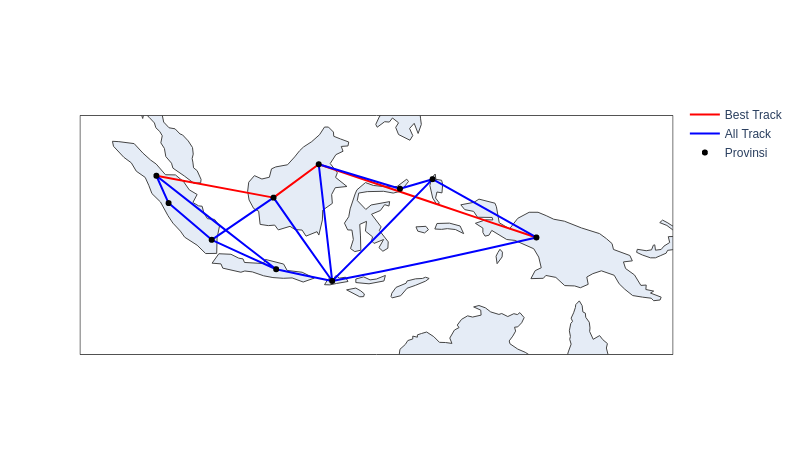

In [12]:
lons = []
lats = []
lons = np.empty(3 * len(best_track_map))
lons[::3] = best_track_map['lon_awal']
lons[1::3] = best_track_map['lon_tujuan']
lons[2::3] = None
lats = np.empty(3 * len(best_track_map))
lats[::3] = best_track_map['lat_awal']
lats[1::3] = best_track_map['lat_tujuan']
lats[2::3] = None

lons_ = []
lats_ = []
lons_ = np.empty(3 * len(df_gn_map))
lons_[::3] = df_gn_map['lon_awal']
lons_[1::3] = df_gn_map['lon_tujuan']
lons_[2::3] = None
lats_ = np.empty(3 * len(df_gn_map))
lats_[::3] = df_gn_map['lat_awal']
lats_[1::3] = df_gn_map['lat_tujuan']
lats_[2::3] = None

fig = go.Figure()
fig.update_geos(
    center=dict(lon=122, lat=-4),
    lataxis_range=[-12,12], lonaxis_range=[-30, 30]
)


fig.add_trace(
    go.Scattergeo(
        lon = lons,
        lat = lats,
        mode = 'lines',
        name="Best Track",
        line = dict(width = 2,color = 'red'),
        opacity = 1
    )
)
fig.add_trace(
    go.Scattergeo(
        lon = lons_,
        lat = lats_,
        mode = 'lines',
        name="All Track",
        line = dict(width = 2,color = 'blue'),
        opacity = 1
    )
)
fig.add_trace(
    go.Scattergeo(
        lon = df_hn['longitude'],
        lat = df_hn['latitude'],
        text = df_hn['provinsi_text'],
        locationmode = 'geojson-id',
        mode='markers',
        name="Provinsi",
        marker = dict(color = 'black')
    )
)

fig.update(layout_showlegend=True)
gitly.show(fig)

# Testing with Romania Map

In [13]:
dict_lokasi = {'Kota':['Arad', 'Bucharest', 'Craiova','Dobreta','Eforie',
                       'Fagaras','Giurgiu','Hirsova','Iasi','Lugoj',
                       'Mehadia','Neamt','Oradea','Pitesti', 'Rimnicu Vilcea',
                       'Sibiu','Timisoara','Urziceni','Vaslui','Zerind'],
               'tujuan(km)':[366,0,160,242,161,
                             176,77,151,226,244,
                             241,234,380,101,193,
                             253,329,80,199,374]}
df_hn = pd.DataFrame(dict_lokasi)
df_hn

,Kota,tujuan(km)
0,Arad,366
1,Bucharest,0
2,Craiova,160
3,Dobreta,242
4,Eforie,161
5,Fagaras,176
6,Giurgiu,77
7,Hirsova,151
8,Iasi,226
9,Lugoj,244


In [14]:
dict_rute = {'kota_awal':['Arad','Arad','Arad',
                          'Zerind',
                          'Oradea',
                          'Timisoara',
                          'Lugoj',
                          'Mehadia',
                          'Dobreta',
                          'Craiova','Craiova',
                          'Sibiu','Sibiu',
                          'Rimnicu Vilcea',
                          'Pitesti',
                          'Fagaras',
                          'Bucharest','Bucharest',
                          'Urziceni','Urziceni',
                          'Hirsova',
                          'Vaslui',
                          'Iasi'], 
             'kota_tujuan':['Zerind','Timisoara','Sibiu',
                            'Oradea',
                            'Sibiu',
                            'Lugoj',
                            'Mehadia',
                            'Dobreta',
                            'Craiova',
                            'Rimnicu Vilcea', 'Pitesti',
                            'Rimnicu Vilcea','Fagaras',
                            'Pitesti',
                            'Bucharest',
                            'Bucharest',
                            'Giurgiu','Urziceni',
                            'Hirsova','Vaslui',
                            'Eforie',
                            'Iasi',
                            'Neamt'],
             'jarak(km)':[75,118,140,
                          71,
                          151,
                          111,
                          70,
                          75,
                          120,
                          146,138,
                          80,99,
                          97,
                          101,
                          211,
                          90,
                          85,
                          98,
                          142,
                          86,
                          92,
                          87]}
df_gn = pd.DataFrame(dict_rute)
df_gn

,kota_awal,kota_tujuan,jarak(km)
0,Arad,Zerind,75
1,Arad,Timisoara,118
2,Arad,Sibiu,140
3,Zerind,Oradea,71
4,Oradea,Sibiu,151
5,Timisoara,Lugoj,111
6,Lugoj,Mehadia,70
7,Mehadia,Dobreta,75
8,Dobreta,Craiova,120
9,Craiova,Rimnicu Vilcea,146


In [15]:
# Arad to Bucharest

df_kumpulan_rute = df_gn[['kota_awal', 'kota_tujuan', 'jarak(km)']].copy()

reversed_1 = df_gn['kota_awal'].tolist()
reversed_2 = df_gn['kota_tujuan'].tolist()
jarak_1 = df_gn['jarak(km)'].tolist()

reversed_data = {'kota_awal':reversed_2, 'kota_tujuan':reversed_1, 'jarak(km)':jarak_1}
df_kumpulan_rute_inversed = pd.DataFrame(data=reversed_data)

df_kumpulan_rute = df_kumpulan_rute.append(df_kumpulan_rute_inversed)
df_kumpulan_rute = df_kumpulan_rute.merge(df_hn[['Kota','tujuan(km)']],
                                          left_on = 'kota_tujuan',
                                          right_on='Kota',
                                          how = 'left').drop(columns=['Kota'])
df_kumpulan_rute

,kota_awal,kota_tujuan,jarak(km),tujuan(km)
0,Arad,Zerind,75,374
1,Arad,Timisoara,118,329
2,Arad,Sibiu,140,253
3,Zerind,Oradea,71,380
4,Oradea,Sibiu,151,253
5,Timisoara,Lugoj,111,244
6,Lugoj,Mehadia,70,241
7,Mehadia,Dobreta,75,242
8,Dobreta,Craiova,120,160
9,Craiova,Rimnicu Vilcea,146,193


In [16]:
best_track = a_star_map(dataset_name = df_kumpulan_rute,
                        kolom_awal='kota_awal', awal='Arad',
                        kolom_tujuan='kota_tujuan', tujuan='Bucharest',
                        h_n='tujuan(km)', g_n='jarak(km)')[0]
best_track

,kota_awal,kota_tujuan,jarak(km),tujuan(km),g_n,h_n,f_n,step,f_n_min
2,Arad,Sibiu,140,253,140,253,393,1,0.0
11,Sibiu,Rimnicu Vilcea,80.0,193.0,220.0,193.0,413.0,2,393.0
13,Rimnicu Vilcea,Pitesti,97.0,101.0,317.0,101.0,418.0,3,413.0
14,Pitesti,Bucharest,101.0,0.0,418.0,0.0,418.0,5,418.0


In [17]:
step_table = a_star_map(dataset_name = df_kumpulan_rute,
                        kolom_awal='kota_awal', awal='Arad',
                        kolom_tujuan='kota_tujuan', tujuan='Bucharest',
                        h_n='tujuan(km)', g_n='jarak(km)')[1]
step_table

,kota_awal,kota_tujuan,jarak(km),tujuan(km),g_n,h_n,f_n,step,f_n_min
0,Arad,Zerind,75,374,75,374,449,1,0.0
1,Arad,Timisoara,118,329,118,329,447,1,0.0
25,Sibiu,Arad,140.0,366.0,280.0,366.0,646.0,2,393.0
27,Sibiu,Oradea,151.0,380.0,291.0,380.0,671.0,2,393.0
32,Rimnicu Vilcea,Craiova,146.0,160.0,366.0,160.0,526.0,3,413.0
34,Rimnicu Vilcea,Sibiu,80.0,253.0,300.0,253.0,553.0,3,413.0
15,Fagaras,Bucharest,211.0,0.0,450.0,0.0,450.0,4,415.0
35,Fagaras,Sibiu,99.0,253.0,338.0,253.0,591.0,4,415.0
14,Pitesti,Bucharest,101.0,0.0,418.0,0.0,418.0,5,418.0
33,Pitesti,Craiova,138.0,160.0,455.0,160.0,615.0,5,418.0


In [18]:
step_table_drop = a_star_map(dataset_name = df_kumpulan_rute,
                        kolom_awal='kota_awal', awal='Arad',
                        kolom_tujuan='kota_tujuan', tujuan='Bucharest',
                        h_n='tujuan(km)', g_n='jarak(km)')[2]
step_table_drop

,kota_awal,kota_tujuan,jarak(km),tujuan(km),g_n,h_n,f_n,step,f_n_min
2,Arad,Sibiu,140,253,140,253,393,1,0.0
11,Sibiu,Rimnicu Vilcea,80.0,193.0,220.0,193.0,413.0,2,393.0
12,Sibiu,Fagaras,99.0,176.0,239.0,176.0,415.0,2,393.0
13,Rimnicu Vilcea,Pitesti,97.0,101.0,317.0,101.0,418.0,3,413.0
